# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import json
import numpy as np
import glob
import pandas as pd

# importing modules
import urllib.request
from PIL import Image
from keras import layers, models
import tensorflow as tf

'''
# all-images file should be uploaded to the same file
imageNames = glob.glob("/content/drive/MyDrive/deep learning dataset/images/*")

dataset = []
labels = []

for i, imName in enumerate(imageNames):

    # Opening JSON file
    f = open(imName)
    data = json.load(f)
    for j in range(len(data['annotations'])):

        if 'COVID-19' in (data['annotations'][j]['name']):
          #load images from url    
            urllib.request.urlretrieve(data['image']['url'],"img.png")    
            img = Image.open("img.png")
            #convert images to grayscale
            imgGray = img.convert('L')
            #resize the image (156x156)
            im = imgGray.resize((156,156), Image.LANCZOS)           
            label = data['annotations'][j]['name']
            dataset.append(np.array(im))
            labels.append(label)
            print(label)
            break

        if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
            or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
            or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
            #load images from url    
            urllib.request.urlretrieve(data['image']['url'],"img.png")    
            img = Image.open("img.png")
            #convert images to grayscale
            imgGray = img.convert('L')
            #resize the image (156x156)
            im = imgGray.resize((156,156), Image.LANCZOS)           
            label = data['annotations'][j]['name']
            dataset.append(np.array(im))
            labels.append(label)
            break

#Convert data shape of (n_of_samples, width, height, 1)
dataset = np.dstack(dataset)    
dataset = np.rollaxis(dataset,-1)
labels = np.array(labels)

#convert images gray scale to rgb
data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# save data and labels into a folder
np.save("/content/drive/MyDrive/deep learning dataset/data.npy", data)
np.save("/content/drive/MyDrive/deep learning dataset/labels.npy", labels)
'''

'\n# all-images file should be uploaded to the same file\nimageNames = glob.glob("/content/drive/MyDrive/deep learning dataset/images/*")\n\ndataset = []\nlabels = []\n\nfor i, imName in enumerate(imageNames):\n\n    # Opening JSON file\n    f = open(imName)\n    data = json.load(f)\n    for j in range(len(data[\'annotations\'])):\n\n        if \'COVID-19\' in (data[\'annotations\'][j][\'name\']):\n          #load images from url    \n            urllib.request.urlretrieve(data[\'image\'][\'url\'],"img.png")    \n            img = Image.open("img.png")\n            #convert images to grayscale\n            imgGray = img.convert(\'L\')\n            #resize the image (156x156)\n            im = imgGray.resize((156,156), Image.LANCZOS)           \n            label = data[\'annotations\'][j][\'name\']\n            dataset.append(np.array(im))\n            labels.append(label)\n            print(label)\n            break\n\n        if \'Viral Pneumonia\' in (data[\'annotations\'][j][\'name

In [ ]:
import numpy as np
data = np.load('/content/drive/MyDrive/data.npy')
labels = np.load('/content/drive/MyDrive/labels.npy')

In [ ]:
#setting numpy and tensor flow seed to ensure reproducibility of the results
import tensorflow as tf

# Set the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Preprocessing Steps



## Splitting Data

In [ ]:
np.unique(labels)

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, stratify=labels, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.25, stratify=y_train, random_state=42) #split 0.25 this time, because 0.25*0.8 = a 0.2 split for validation
print(str(X_train.shape[0]) + ' train samples')
print(str(X_validation.shape[0]) + ' validation samples')
print(str(X_test.shape[0]) + ' test samples')

3834 train samples
1279 validation samples
1279 test samples


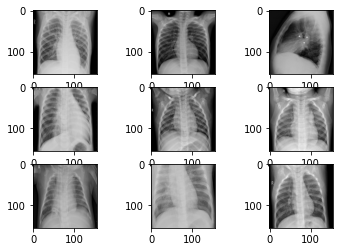

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
np.unique(y_train)

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

## Normalize Data

In [ ]:
# encode Y class values as integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_validation = encoder.transform(y_validation)
y_test = encoder.transform(y_test)

In [ ]:
# Converting to categorical
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train) 
y_validation_cat = to_categorical(y_validation) 
y_test_cat = to_categorical(y_test)

In [ ]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')

# Normalizing x values to 0-1
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(3834, 156, 156, 3)

# Create Baseline Model

https://openaccess.thecvf.com/content_ECCV_2018/html/Dhruv_Mahajan_Exploring_the_Limits_ECCV_2018_paper.html use it to justify why we used categorical cross entropy



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create a sequential model
model = Sequential()
model.add(layers.Conv2D(64,3,activation="relu",input_shape = (156,156,3),padding='same'))
model.add(layers.Conv2D(32,3,activation="relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(layers.Conv2D(64,3, activation = "relu", padding='same'))
model.add(layers.Conv2D(32,3, activation = "relu", padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(layers.Flatten())

model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(4, activation = "softmax"))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train_cat, validation_data = (X_validation, y_validation_cat), batch_size=32, epochs = 10, verbose = 1)



Epoch 1/10
120/120 [==============================] - 25s 83ms/step - loss: 0.9379 - accuracy: 0.5780 - val_loss: 0.7258 - val_accuracy: 0.7005
Epoch 2/10
120/120 [==============================] - 8s 65ms/step - loss: 0.7031 - accuracy: 0.7063 - val_loss: 0.6224 - val_accuracy: 0.7365
Epoch 3/10
120/120 [==============================] - 8s 64ms/step - loss: 0.6020 - accuracy: 0.7493 - val_loss: 0.5698 - val_accuracy: 0.7686
Epoch 4/10
120/120 [==============================] - 8s 65ms/step - loss: 0.5438 - accuracy: 0.7752 - val_loss: 0.5542 - val_accuracy: 0.7662
Epoch 5/10
120/120 [==============================] - 8s 64ms/step - loss: 0.4979 - accuracy: 0.7926 - val_loss: 0.6178 - val_accuracy: 0.7084
Epoch 6/10
120/120 [==============================] - 8s 70ms/step - loss: 0.4542 - accuracy: 0.8083 - val_loss: 0.5825 - val_accuracy: 0.7600
Epoch 7/10
120/120 [==============================] - 8s 66ms/step - loss: 0.4028 - accuracy: 0.8357 - val_loss: 0.5854 - val_accuracy: 0.767

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                    

# Analyze the performance of the baseline model

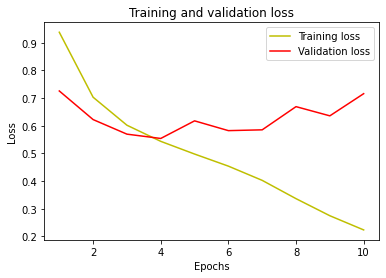

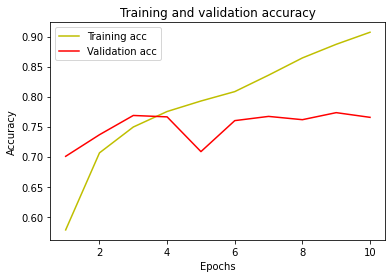

In [ ]:
# Note: adapted from here: https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing#scrollTo=tUtN6d9keAQn
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40/40 [==============================] - 1s 18ms/step


<AxesSubplot:>

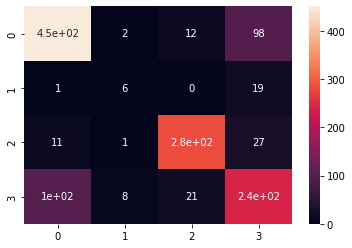

In [ ]:
# Note: adapted from here: https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing#scrollTo=tUtN6d9keAQn

import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predicting the validation set results confusion matrix
y_pred = model.predict(X_validation)

# Making the Confusion Matrix
cm = confusion_matrix(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True)

40/40 [==============================] - 1s 14ms/step


<AxesSubplot:>

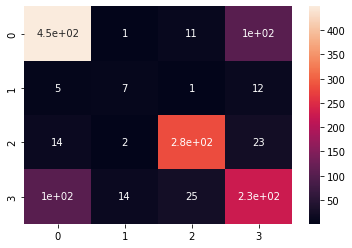

In [ ]:
# Predicting the Test set results confusion matrix
y_pred = model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm, annot=True)

40/40 [==============================] - 1s 14ms/step


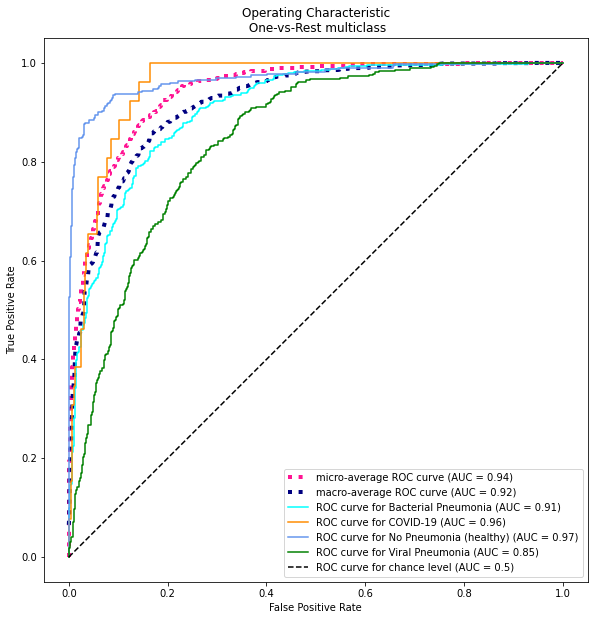

In [ ]:
###### you have to double check here that the labels and the classes 0,1,2,3 for now assume that it's correct

# ROC validation

# ROC curves need more research One vs one???
# Check here when you have more time: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_validation)
n_classes = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(10, 10))

#Adding micro average to the plot
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_validation_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Adding macro average to the plot, taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
# Average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Adding class specific ROC curves to the plot
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_validation_cat[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {np.unique(labels)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Operating Characteristic\n One-vs-Rest multiclass")
plt.legend()
plt.show()

40/40 [==============================] - 1s 14ms/step


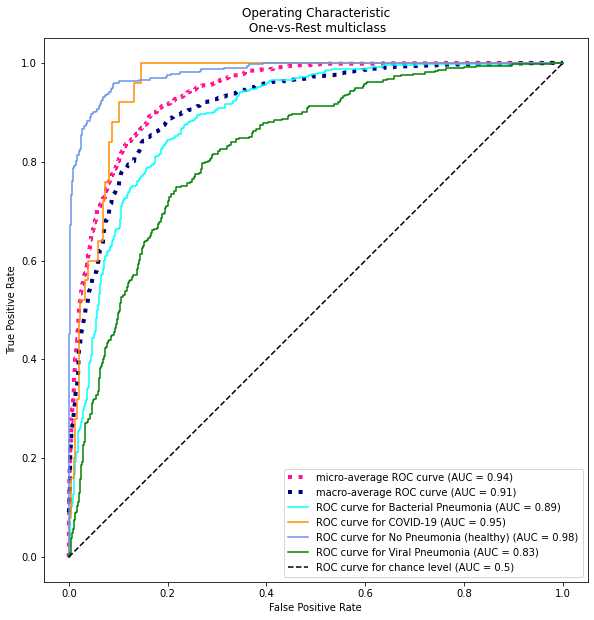

In [ ]:
# ROC Test

# ROC curves need more research One vs one???
# Check here when you have more time: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test)
n_classes = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(10, 10))

#Adding micro average to the plot
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Adding macro average to the plot, taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
# Average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Adding class specific ROC curves to the plot
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_cat[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {np.unique(labels)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Operating Characteristic\n One-vs-Rest multiclass")
plt.legend()
plt.show()

In [ ]:
#Scores:
from sklearn.metrics import classification_report

y_pred = model.predict(X_validation)
print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

y_pred = model.predict(X_test)
print(classification_report(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

# note recall of the positive class (covid) is also known as “sensitivity”; recall of the negative class is “specificity”. <-- research this more, is there an easy way to calculate this


40/40 [==============================] - 1s 14ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.80      0.80      0.80       563
              COVID-19       0.35      0.23      0.28        26
No Pneumonia (healthy)       0.90      0.88      0.89       321
       Viral Pneumonia       0.62      0.65      0.64       369

              accuracy                           0.77      1279
             macro avg       0.67      0.64      0.65      1279
          weighted avg       0.76      0.77      0.76      1279

40/40 [==============================] - 1s 15ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.78      0.80      0.79       564
              COVID-19       0.29      0.28      0.29        25
No Pneumonia (healthy)       0.88      0.88      0.88       321
       Viral Pneumonia       0.62      0.61      0.62       369

              accuracy                           0.75  

In [ ]:
y_before = model.predict(X_test)
y_pred = y_before.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

from sklearn.metrics import precision_recall_fscore_support
res = []
for l, name in zip(range(n_classes),np.unique(labels)):
    prec,recall,fscore,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None, beta=1)
    res.append([name,recall[0],recall[1],fscore[0]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity', 'f1score'])

40/40 [==============================] - 1s 16ms/step


,class,sensitivity,specificity,f1score
0,Bacterial Pneumonia,0.791608,0.845745,0.827485
1,COVID-19,0.995215,0.120000,0.988906
2,No Pneumonia (healthy),0.964509,0.878505,0.961999
3,Viral Pneumonia,0.874725,0.579946,0.855454


# Adapting/fine-tuning the network


Model 2
>https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer, --> dropout


In [ ]:
# test dropout layers 

#dropout layers
drop_conv=0.25
drop_dens=0.40

model2 = Sequential()
model2.add(layers.Conv2D(64,3,activation="relu",input_shape = (156,156,3),padding='same'))
model2.add(layers.Conv2D(32,3,activation="relu", padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(layers.Dropout(drop_conv))
model2.add(layers.Conv2D(64,3, activation = "relu", padding='same'))
model2.add(layers.Conv2D(32,3, activation = "relu", padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model2.add(layers.Dropout(drop_conv))
model2.add(layers.Flatten())

model2.add(layers.Dense(32, activation = "relu"))
model2.add(layers.Dropout(drop_dens))
model2.add(layers.Dense(32, activation = "relu"))
model2.add(layers.Dropout(drop_dens))
model2.add(layers.Dense(4, activation = "softmax"))

model2.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
history2 = model2.fit(X_train, y_train_cat, validation_data = (X_validation, y_validation_cat), batch_size=32, epochs = 10, verbose = 1)



Epoch 1/10
120/120 [==============================] - 15s 95ms/step - loss: 1.2486 - accuracy: 0.3962 - val_loss: 1.0715 - val_accuracy: 0.5973
Epoch 2/10
120/120 [==============================] - 11s 88ms/step - loss: 1.0126 - accuracy: 0.5303 - val_loss: 0.7506 - val_accuracy: 0.6763
Epoch 3/10
120/120 [==============================] - 11s 88ms/step - loss: 0.9037 - accuracy: 0.5921 - val_loss: 0.7671 - val_accuracy: 0.7310
Epoch 4/10
120/120 [==============================] - 11s 94ms/step - loss: 0.8217 - accuracy: 0.6463 - val_loss: 0.7088 - val_accuracy: 0.7326
Epoch 5/10
120/120 [==============================] - 11s 89ms/step - loss: 0.8005 - accuracy: 0.6541 - val_loss: 0.7215 - val_accuracy: 0.7310
Epoch 6/10
120/120 [==============================] - 10s 87ms/step - loss: 0.7411 - accuracy: 0.6920 - val_loss: 0.6488 - val_accuracy: 0.7475
Epoch 7/10
120/120 [==============================] - 10s 87ms/step - loss: 0.7111 - accuracy: 0.7053 - val_loss: 0.6201 - val_accuracy:

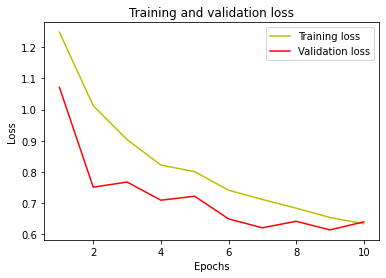

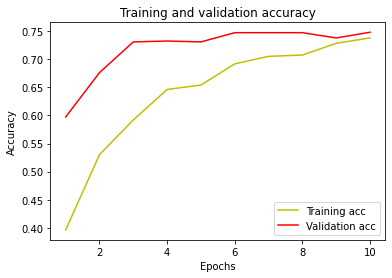

In [ ]:
# Note: adapted from here: https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing#scrollTo=tUtN6d9keAQn
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history2.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history2.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model2.predict(X_validation)
print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

40/40 [==============================] - 1s 14ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.82      0.78      0.80       563
              COVID-19       0.00      0.00      0.00        26
No Pneumonia (healthy)       0.78      0.90      0.83       321
       Viral Pneumonia       0.61      0.63      0.62       369

              accuracy                           0.75      1279
             macro avg       0.55      0.58      0.56      1279
          weighted avg       0.73      0.75      0.74      1279



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 3
https://journalofbigdata.springeropen.com/counter/pdf/10.1186/s40537-019-0197-0.pdf --> data augmentation

In [ ]:
# test data augmentation 

from keras.preprocessing.image import ImageDataGenerator

#dropout layers
drop_conv=0.20
drop_dens=0.25

#Datagen, inspiration taken from here; https://github.com/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial103_DL_terminology_data_augmentation1.ipynb
train_datagen = ImageDataGenerator(rotation_range=15,  #Too much rotation may hurt accuracy, especially for small datasets.
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1,
    vertical_flip=False,
    horizontal_flip = True,
    fill_mode="reflect")

#train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train_cat,
    batch_size = 32)  #images to generate in a batch

steps_per_epoch = len(X_train) // 32 

model3 = Sequential()
model3.add(layers.Conv2D(64,3,activation="relu",input_shape = (156,156,3),padding='same'))
model3.add(layers.Conv2D(32,3,activation="relu", padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model3.add(layers.Dropout(drop_conv))
model3.add(layers.Conv2D(64,3, activation = "relu", padding='same'))
model3.add(layers.Conv2D(32,3, activation = "relu", padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model3.add(layers.Dropout(drop_conv))
model3.add(layers.Flatten())

model3.add(layers.Dense(32, activation = "relu"))
model3.add(layers.Dropout(drop_dens))
model3.add(layers.Dense(32, activation = "relu"))
model3.add(layers.Dropout(drop_dens))
model3.add(layers.Dense(4, activation = "softmax"))

model3.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
history3 = model3.fit(train_generator, steps_per_epoch = steps_per_epoch, validation_data = (X_validation, y_validation_cat), epochs = 25, verbose = 1)



Epoch 1/25
119/119 [==============================] - 28s 214ms/step - loss: 1.2174 - accuracy: 0.4290 - val_loss: 1.1162 - val_accuracy: 0.5223
Epoch 2/25
119/119 [==============================] - 25s 208ms/step - loss: 1.1048 - accuracy: 0.4776 - val_loss: 0.9809 - val_accuracy: 0.5536
Epoch 3/25
119/119 [==============================] - 25s 207ms/step - loss: 1.0280 - accuracy: 0.5066 - val_loss: 0.9358 - val_accuracy: 0.5794
Epoch 4/25
119/119 [==============================] - 25s 207ms/step - loss: 1.0041 - accuracy: 0.5255 - val_loss: 0.9033 - val_accuracy: 0.5661
Epoch 5/25
119/119 [==============================] - 24s 197ms/step - loss: 0.9603 - accuracy: 0.5597 - val_loss: 0.8462 - val_accuracy: 0.6333
Epoch 6/25
119/119 [==============================] - 25s 212ms/step - loss: 0.9002 - accuracy: 0.6013 - val_loss: 0.8132 - val_accuracy: 0.6271
Epoch 7/25
119/119 [==============================] - 24s 203ms/step - loss: 0.8645 - accuracy: 0.6223 - val_loss: 0.7678 - val_ac

In [ ]:
y_pred = model3.predict(X_validation)
print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

40/40 [==============================] - 1s 16ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.78      0.84      0.81       563
              COVID-19       0.00      0.00      0.00        26
No Pneumonia (healthy)       0.85      0.86      0.86       321
       Viral Pneumonia       0.67      0.64      0.65       369

              accuracy                           0.77      1279
             macro avg       0.58      0.58      0.58      1279
          weighted avg       0.75      0.77      0.76      1279



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 4

The last activation function is changed from softmax to sigmoid. The batch size is changed to 128 instead of 32

> https://ieeexplore.ieee.org/abstract/document/8943952 --> sigmoid function

> https://arxiv.org/abs/1712.02029 --> increasing batch size


> https://itms-journals.rtu.lv/article/view/itms-2017-0003 --> increasing batch size





In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create a sequential model
model4 = Sequential()
model4.add(layers.Conv2D(64,3,activation="relu",input_shape = (156,156,3),padding='same'))
model4.add(layers.Conv2D(32,3,activation="relu", padding='same'))
model4.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model4.add(layers.Conv2D(64,3, activation = "relu", padding='same'))
model4.add(layers.Conv2D(32,3, activation = "relu", padding='same'))
model4.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model4.add(layers.Flatten())

model4.add(layers.Dense(32, activation = "relu"))
model4.add(layers.Dense(32, activation = "relu"))
model4.add(layers.Dense(4, activation = "sigmoid")) #before it was softmax

model4.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])
history4 = model4.fit(X_train, y_train_cat, validation_data = (X_validation, y_validation_cat), batch_size=128, epochs = 10, verbose = 1) #before batch_size was 32

Epoch 1/10
30/30 [==============================] - 18s 422ms/step - loss: 1.1523 - accuracy: 0.4570 - val_loss: 0.9415 - val_accuracy: 0.6263
Epoch 2/10
30/30 [==============================] - 7s 240ms/step - loss: 0.8346 - accuracy: 0.6492 - val_loss: 0.7121 - val_accuracy: 0.7107
Epoch 3/10
30/30 [==============================] - 7s 236ms/step - loss: 0.6459 - accuracy: 0.7353 - val_loss: 0.6367 - val_accuracy: 0.7475
Epoch 4/10
30/30 [==============================] - 7s 239ms/step - loss: 0.5683 - accuracy: 0.7666 - val_loss: 0.5900 - val_accuracy: 0.7686
Epoch 5/10
30/30 [==============================] - 7s 236ms/step - loss: 0.5271 - accuracy: 0.7851 - val_loss: 0.5780 - val_accuracy: 0.7740
Epoch 6/10
30/30 [==============================] - 7s 240ms/step - loss: 0.4892 - accuracy: 0.7939 - val_loss: 0.5615 - val_accuracy: 0.7764
Epoch 7/10
30/30 [==============================] - 7s 236ms/step - loss: 0.4425 - accuracy: 0.8132 - val_loss: 0.6039 - val_accuracy: 0.7717
Epoch

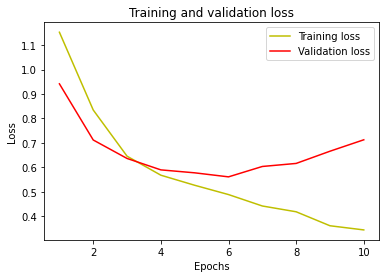

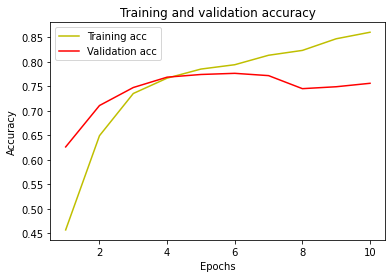

In [ ]:
# Note: adapted from here: https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing#scrollTo=tUtN6d9keAQn
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history4.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history4.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Scores:
from sklearn.metrics import classification_report
y_pred = model4.predict(X_validation)
print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

#y_pred = model4.predict(X_validation)
#print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))

# note recall of the positive class (covid) is also known as “sensitivity”; recall of the negative class is “specificity”. <-- research this more, is there an easy way to calculate this

40/40 [==============================] - 1s 14ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.76      0.83      0.80       563
              COVID-19       0.25      0.04      0.07        26
No Pneumonia (healthy)       0.92      0.82      0.87       321
       Viral Pneumonia       0.62      0.63      0.63       369

              accuracy                           0.76      1279
             macro avg       0.64      0.58      0.59      1279
          weighted avg       0.75      0.76      0.75      1279



Model 5
>The last activation function is changed from softmax to sigmoid. The batch size is changed to 128 instead of 32. The optimizer is adamax instead of adam. I also tried sgd and adagrad, but they had less accuracy

>https://link.springer.com/chapter/10.1007/3-540-59497-3_175 --> sigmoid function

>https://ieeexplore.ieee.org/abstract/document/8862686?casa_token=S7mxfzQoHosAAAAA:NlwNcU0HnJWufA2BqE2moDKfEwrSUdaupvkzUTe_yWFLvx2AwqMWZVlDtGIiXVFqV0-h4E5RieXUFac --> adamax


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create a sequential model
model5 = Sequential()
model5.add(layers.Conv2D(64,3,activation="relu",input_shape = (156,156,3),padding='same'))
model5.add(layers.Conv2D(32,3,activation="relu", padding='same'))
model5.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model5.add(layers.Conv2D(64,3, activation = "relu", padding='same'))
model5.add(layers.Conv2D(32,3, activation = "relu", padding='same'))
model5.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model5.add(layers.Flatten())

model5.add(layers.Dense(32, activation = "relu"))
model5.add(layers.Dense(32, activation = "relu"))
model5.add(layers.Dense(4, activation = "sigmoid")) #before it was softmax

model5.compile(optimizer = "adamax", loss = "categorical_crossentropy", metrics=["accuracy"]) #before optimizer was adam
history5 = model5.fit(X_train, y_train_cat, validation_data = (X_validation, y_validation_cat), batch_size=128, epochs = 10, verbose = 1) 
#before batch_size was 32

Epoch 1/10
30/30 [==============================] - 11s 264ms/step - loss: 1.1723 - accuracy: 0.4322 - val_loss: 1.0871 - val_accuracy: 0.4410
Epoch 2/10
30/30 [==============================] - 8s 261ms/step - loss: 0.9510 - accuracy: 0.5884 - val_loss: 0.7492 - val_accuracy: 0.6959
Epoch 3/10
30/30 [==============================] - 7s 237ms/step - loss: 0.7014 - accuracy: 0.7134 - val_loss: 0.6806 - val_accuracy: 0.7475
Epoch 4/10
30/30 [==============================] - 7s 245ms/step - loss: 0.6251 - accuracy: 0.7499 - val_loss: 0.5892 - val_accuracy: 0.7639
Epoch 5/10
30/30 [==============================] - 7s 239ms/step - loss: 0.5740 - accuracy: 0.7634 - val_loss: 0.5866 - val_accuracy: 0.7654
Epoch 6/10
30/30 [==============================] - 7s 245ms/step - loss: 0.5447 - accuracy: 0.7702 - val_loss: 0.5643 - val_accuracy: 0.7709
Epoch 7/10
30/30 [==============================] - 7s 238ms/step - loss: 0.5154 - accuracy: 0.7859 - val_loss: 0.5445 - val_accuracy: 0.7858
Epoch

In [ ]:

y_pred = model5.predict(X_validation)
print(classification_report(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(labels)))


40/40 [==============================] - 1s 16ms/step
                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.77      0.86      0.81       563
              COVID-19       0.00      0.00      0.00        26
No Pneumonia (healthy)       0.93      0.80      0.86       321
       Viral Pneumonia       0.65      0.66      0.65       369

              accuracy                           0.77      1279
             macro avg       0.59      0.58      0.58      1279
          weighted avg       0.76      0.77      0.76      1279



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


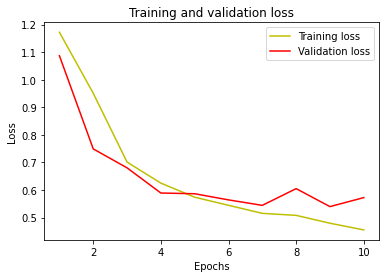

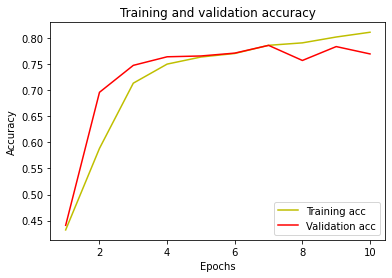

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history5.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history5.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40/40 [==============================] - 1s 14ms/step


<AxesSubplot:>

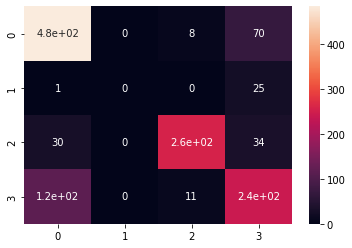

In [ ]:
# Note: adapted from here: https://colab.research.google.com/drive/1WEZxybgoxQz8Lmp_r6Zq6OHYdvwaz2Df?usp=sharing#scrollTo=tUtN6d9keAQn

import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predicting the validation set results confusion matrix
y_pred = model5.predict(X_validation)

# Making the Confusion Matrix
cm = confusion_matrix(y_validation_cat.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True)

40/40 [==============================] - 1s 14ms/step


<AxesSubplot:>

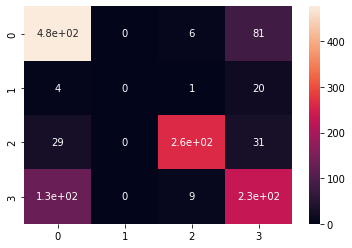

In [ ]:
# Predicting the Test set results confusion matrix
y_pred = model5.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm, annot=True)

40/40 [==============================] - 1s 14ms/step


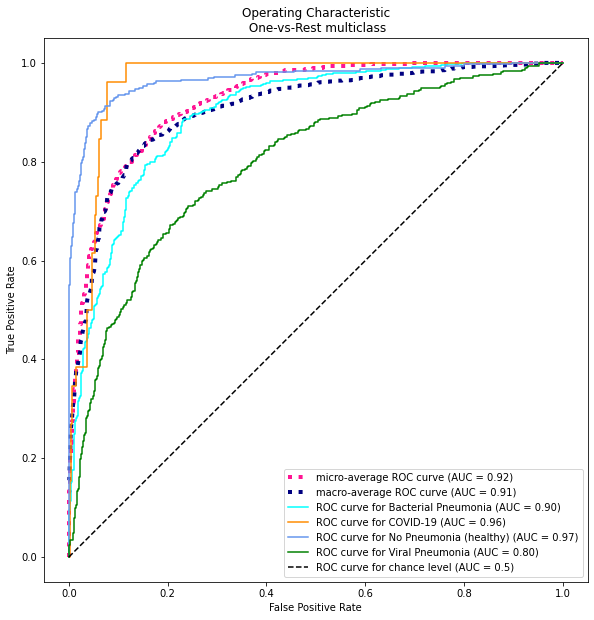

In [ ]:
###### you have to double check here that the labels and the classes 0,1,2,3 for now assume that it's correct

# ROC validation

# ROC curves need more research One vs one???
# Check here when you have more time: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

y_pred = model5.predict(X_validation)
n_classes = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(10, 10))

#Adding micro average to the plot
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_validation_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Adding macro average to the plot, taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
# Average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Adding class specific ROC curves to the plot
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_validation_cat[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {np.unique(labels)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Operating Characteristic\n One-vs-Rest multiclass")
plt.legend()
plt.show()

40/40 [==============================] - 1s 14ms/step


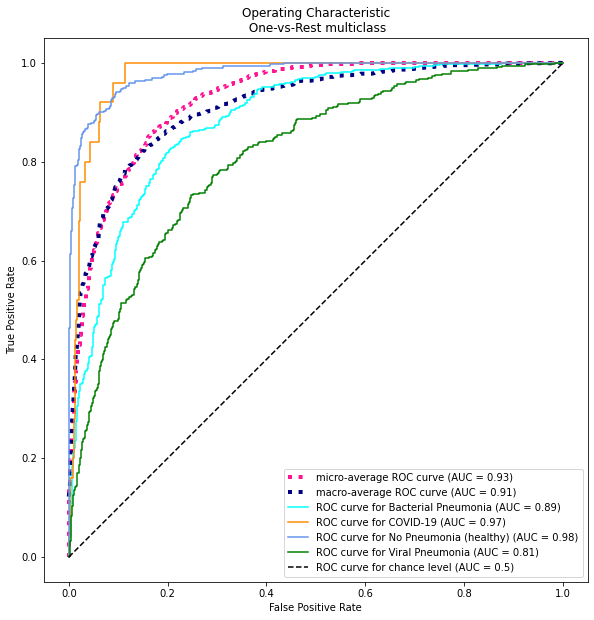

In [ ]:
# ROC Test

# ROC curves need more research One vs one???
# Check here when you have more time: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

y_pred = model5.predict(X_test)
n_classes = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(10, 10))

#Adding micro average to the plot
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Adding macro average to the plot, taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
# Average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Adding class specific ROC curves to the plot
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_cat[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {np.unique(labels)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Operating Characteristic\n One-vs-Rest multiclass")
plt.legend()
plt.show()